## Cluster analysis

Before starting this notebook I would like to state that what is explained here will be elaborated later in the course and might look complicated at this point. If you do not feel familiar with these concepts that is perfectly fine.

In [1]:
import pandas as pd
import seaborn as sns

We will load a digits dataset from sklearn, the machine learning library, these are 8x8 pixel images showing handwritten digits with the correct answer.  
In the dataset there are 1797 images giving the dataset a dimension of (1797, 8*8)

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Before we start, let's print out a few of them, the following cell will do that.
Again, plotting is not yet seen, so the following cells might be overwhelming.

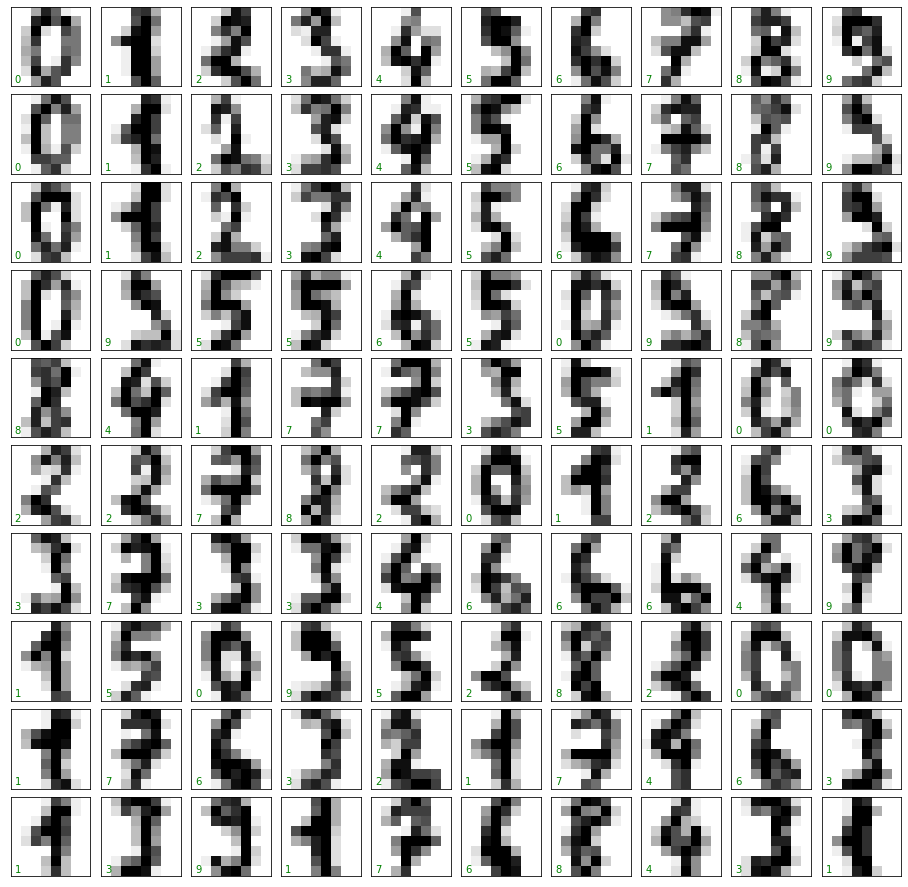

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(16, 16),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In cluster analysis we will try to figure out clusters within the dataset, keep in mind that these cluster are constructed without knowning the correct answer.
Here we use the Isomap algorithm to create clusters, by using fit and transform methods we can create the clusters

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Now that the algorithm seperated the dataset into 10 clusters, we can ask it to print the center of each cluster.  
This gives us an idea how the average digit in that cluster looks like.

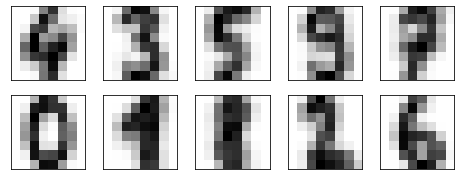

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Those look similar to the actual numbers, confirming that arabic numbers have good visual seperation inbetween.  
Aside from the centers we can also print a few examples from the clusters.

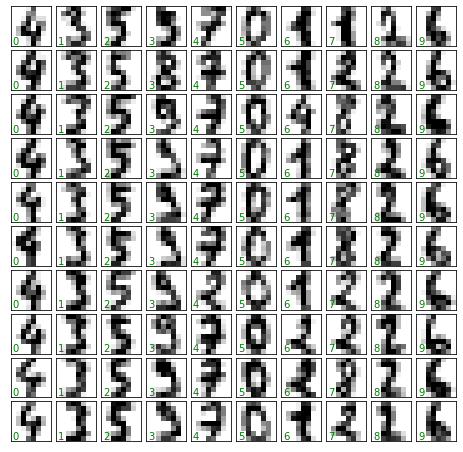

In [6]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[clusters==i%10][int(i/10)], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(i%10),
            transform=ax.transAxes, color='green')

You can see that the cluster number does not match the actual number, that's because our algorithm does not understand which numbers there are.  
It does however understand the differences between the numbers!
This technique can also be used for other datasets where no outcome is given, but we would like to separate our dataset into clusters.

To make this more visible we will use another example of a dataset about the leafs of 3 types of iris flowers.

In [7]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


What we could do here is ask the algorithm to create 3 clusters of records, as the dataset contains 3 types of iris flowers.

We do not supply the algorithm with the information of the species, yet it has to figure out by itself how to seperate the records.

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0)
iris_df['cluster'] = kmeans.fit_predict(iris_df.drop(columns='species'))
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


We can see our data now has an additional feature cluster which contains either 0, 1 or 2.
If the clustering has been performed as expected, the clusters should coincide with the species.
Using a plot we can find out.

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

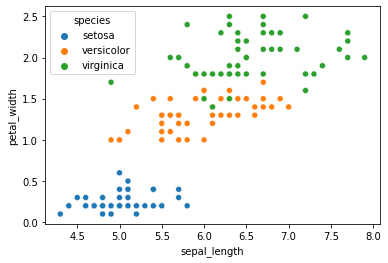

In [9]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_width', hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

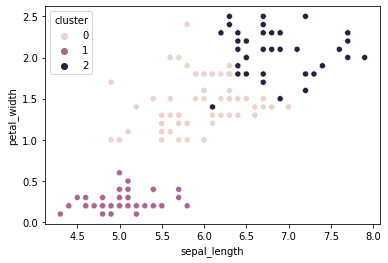

In [10]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_width', hue='cluster')

For some reason seaborn thinks it is useful to change color scheme, yet you can see that there is an uncanny similarity between the clusters and the species, the algorithm was succesful in finding the different species.

Without giving the information we were able to cluster the different species of iris flowers yet we have no idea which cluster belongs to which species.
It is the reasers responsibility to take conclusion in what the different clusters mean!